In [99]:
# Install the ucimlrepo package
!pip install ucimlrepo

In [127]:
import pandas as pd
import numpy as np

In [101]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# # metadata 
# print(heart_disease.metadata) 
  
# # variable information 
# print(heart_disease.variables) 


In [102]:
X['num'] = y['num']
df = X
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [103]:
df.duplicated().sum()

0

In [104]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [105]:
df.dropna(inplace=True)

In [106]:
# df.isna().sum()

In [107]:
df.columns = ['age', 'sex', 'chestPainType', 'restingBloodPressure', 'cholesterol', 'fastingBloodSugar', 'restingEcg', 
    'maxHeartRate', 'exerciseInducedAngina', 'st_depression', 'stSlope', 'major_vessels', 'thalassemia', 'heartDiseaseStatus']
df.head()

,age,sex,chestPainType,restingBloodPressure,cholesterol,fastingBloodSugar,restingEcg,maxHeartRate,exerciseInducedAngina,st_depression,stSlope,major_vessels,thalassemia,heartDiseaseStatus
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [108]:
round(df.describe(), 2)

,age,sex,chestPainType,restingBloodPressure,cholesterol,fastingBloodSugar,restingEcg,maxHeartRate,exerciseInducedAngina,st_depression,stSlope,major_vessels,thalassemia,heartDiseaseStatus
count,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00
mean,54.54,0.68,3.16,131.69,247.35,0.14,1.00,149.60,0.33,1.06,1.60,0.68,4.73,0.95
std,9.05,0.47,0.96,17.76,52.00,0.35,0.99,22.94,0.47,1.17,0.62,0.94,1.94,1.23
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,1.00,0.00,3.00,0.00
50%,56.00,1.00,3.00,130.00,243.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00,3.00,0.00
75%,61.00,1.00,4.00,140.00,276.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00,2.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00,4.00


In [109]:
for var in df.drop(columns=['sex', 'heartDiseaseStatus', 'age']):
    print(f'{var.upper()} min: {df[var].min()} max: {df[var].max()}')

CHESTPAINTYPE min: 1 max: 4
RESTINGBLOODPRESSURE min: 94 max: 200
CHOLESTEROL min: 126 max: 564
FASTINGBLOODSUGAR min: 0 max: 1
RESTINGECG min: 0 max: 2
MAXHEARTRATE min: 71 max: 202
EXERCISEINDUCEDANGINA min: 0 max: 1
ST_DEPRESSION min: 0.0 max: 6.2
STSLOPE min: 1 max: 3
MAJOR_VESSELS min: 0.0 max: 3.0
THALASSEMIA min: 3.0 max: 7.0


In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

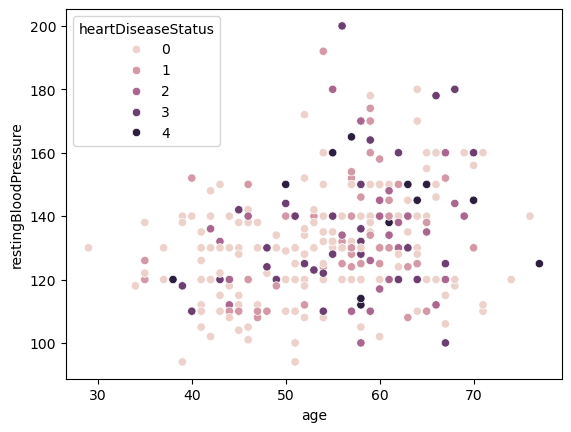

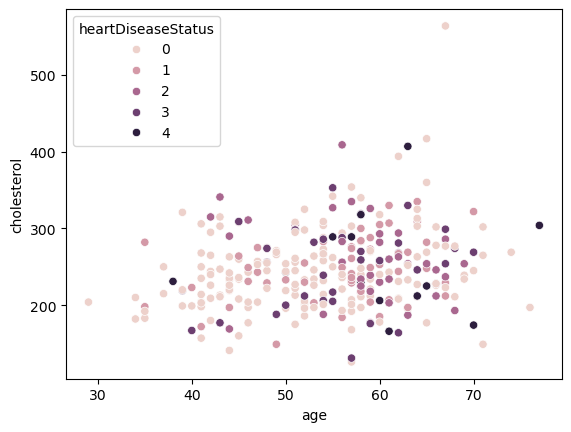

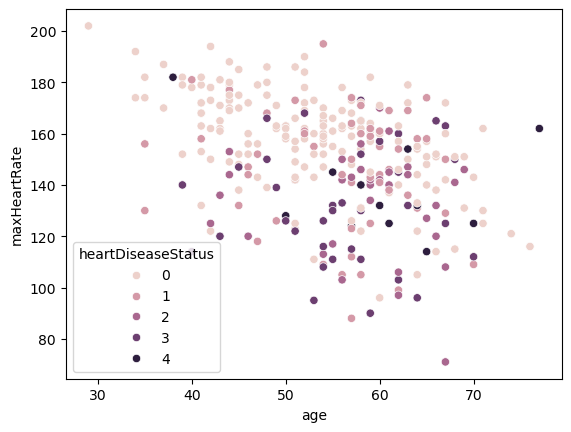

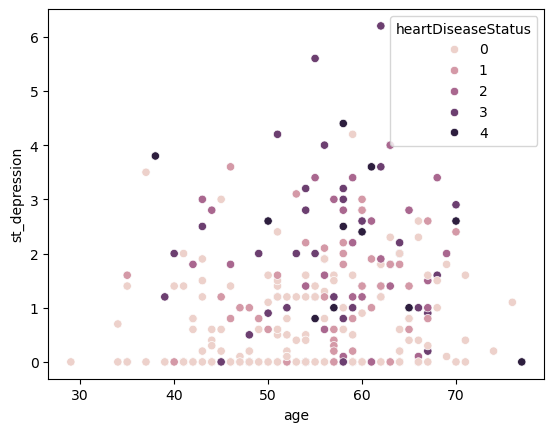

In [111]:
for var in df.iloc[:,[3, 4, 7, 9]]:
    sns.scatterplot(data=df, x='age', y=df[var], hue='heartDiseaseStatus')
    plt.show()

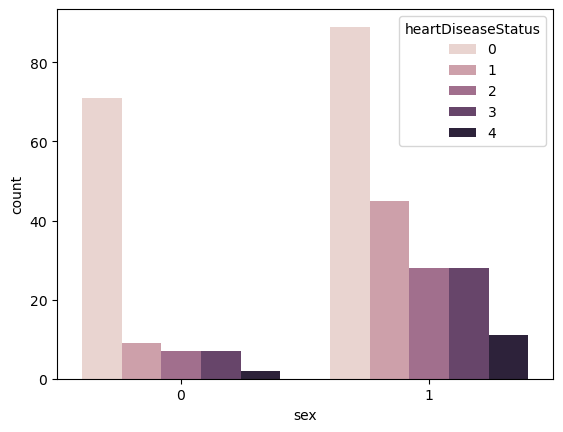

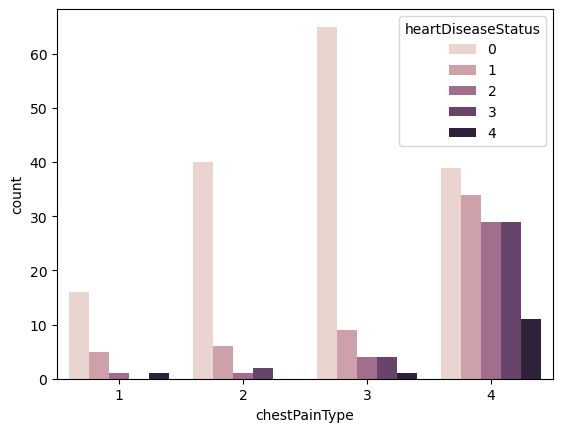

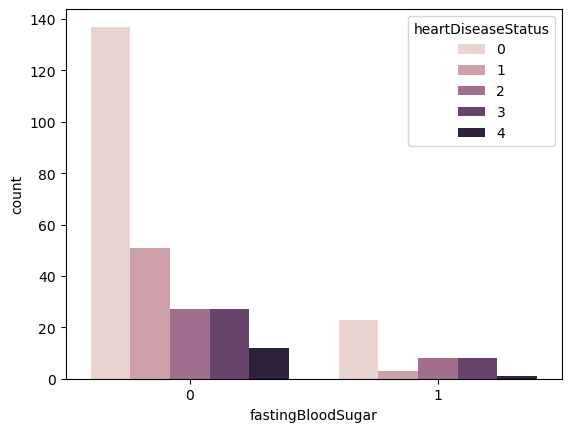

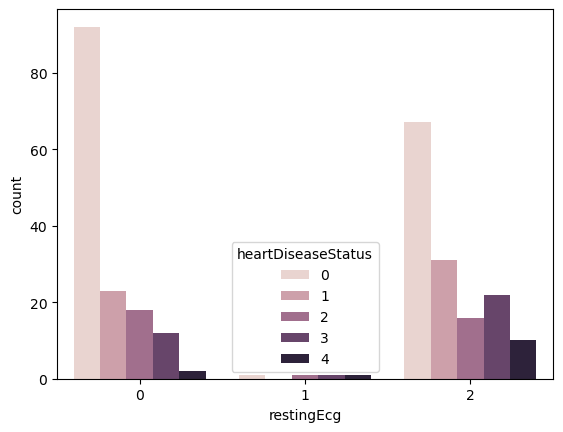

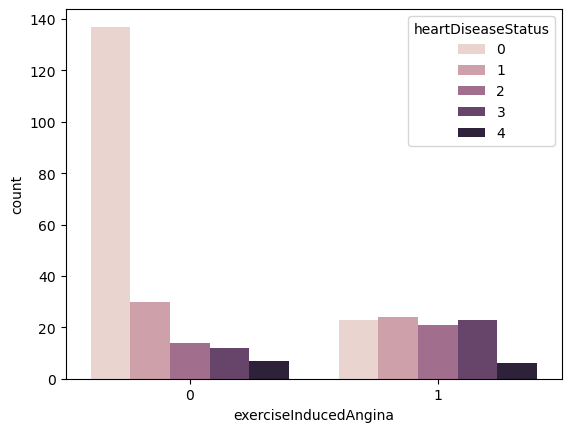

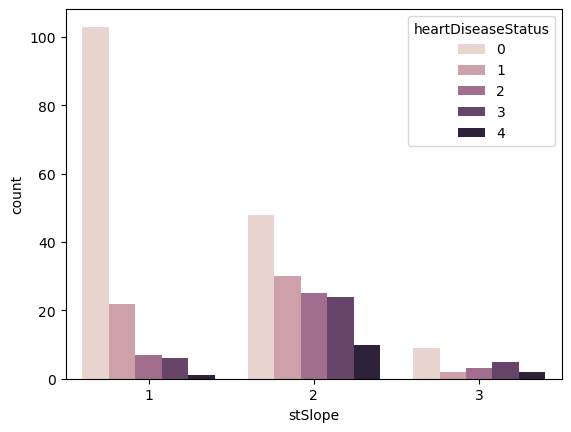

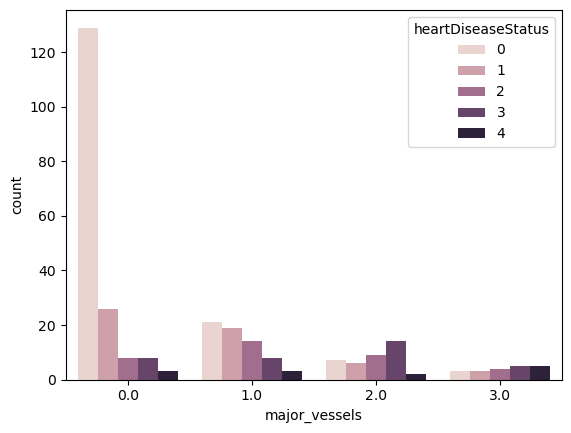

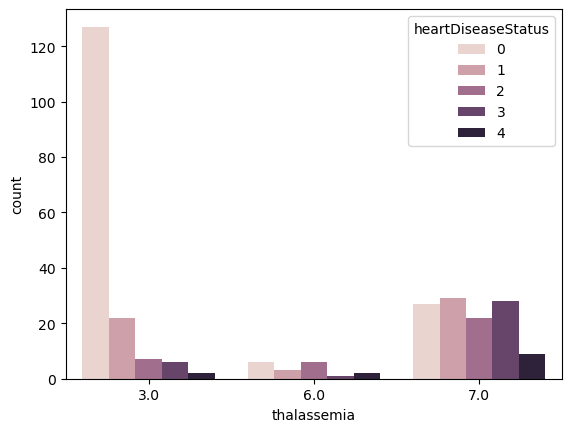

In [112]:
for var in df.iloc[:,[1, 2, 5, 6, 8, 10, 11, 12]]:
    sns.countplot(data=df, x=df[var], hue='heartDiseaseStatus')
    plt.show()

In [113]:
## feature engineering 
df['heartDiseaseStatus'] = df['heartDiseaseStatus'].apply(lambda x: 0 if x == 0 else 1)

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
X = df.drop(columns=['heartDiseaseStatus'])
y = df['heartDiseaseStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=92)


In [126]:
# create a random fores classifier object
rf_model = RandomForestClassifier(n_estimators=3, random_state=92)

# fit model
rf_model.fit(X_train, y_train)

# make predictions
y_pred = rf_model.predict(X_test)

# generate the classification report 
report = classification_report(y_test, y_pred)
print(report)

# comparison_df = pd.DataFrame({
#     'actual': y_test,
#     'predicted': y_pred
# }).reset_index(drop=True)

# comparison_df['isTrue'] = comparison_df['actual'] == comparison_df['predicted']
# comparison_df

              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.93      0.72      0.81        18

    accuracy                           0.80        30
   macro avg       0.81      0.82      0.80        30
weighted avg       0.83      0.80      0.80        30



In [142]:
# Create a random forest classifier object
rf_model2 = RandomForestClassifier(n_estimators=3, random_state=92)

# Perform cross-validation
cv_scores = cross_val_score(rf_model2, X_train, y_train, cv=10)

# Print out the mean and standard deviation of the cross-validation scores
print("CV Mean:", np.mean(cv_scores))
print("CV Standard deviation:", np.std(cv_scores))

# Fit model on entire training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)

CV Mean: 0.7417378917378917
CV Standard deviation: 0.057674014897379576
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.93      0.72      0.81        18

    accuracy                           0.80        30
   macro avg       0.81      0.82      0.80        30
weighted avg       0.83      0.80      0.80        30

